In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint

In [3]:
#The withnans data set contains no Thymus data or KO data
pop = pd.read_csv("/home/jon/my.work/PhD/HomestaticExpansionProject/ModelData/ActivatedCD4pop_Withnans.csv")

#Need to make the naive T cell column and make them into solid cell counts
pop['NaiveT'] = (pop['CD4CT'] - pop['ActivatedCD4CT'])* 10**6

In [41]:
pop.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Print_Alone', 'PrintNumber',
       'FileNumber', 'FileID', 'BatchFile', 'Initials', 'expDate', 'Organ',
       'CageNumber', 'Tag', 'TagNumber', 'DOB', 'Sex', 'Age', 'Hour',
       'Genotype', 'MouseWeight', 'OrganWeight', 'TotalLiveCountInMillions',
       'All_Event', 'AllCells_events', 'LiveCells_events', 'Singlets1_events',
       'Singlets2_events', 'pCD4_events', 'pCD8_events', 'pDP_events',
       'pDN_events', 'CD4_events', 'CD8_events', 'Bcells_events',
       'TCRb_events', 'x4Tregs_events', 'x8Tregs_events', 'DN_events',
       'DP_events', 'CD4prol_events', 'CD8Prol_events', 'BcellProl_events',
       'x4tregProl_events', 'x8tregsProl', 'DPprol_events', 'DNProl_events',
       'intage', 'Bratio', 'CD4Ratio', 'CD8Ratio', 'DPRatio', 'DNRatio',
       'X4TregRatio', 'X8TregRatio', 'TCRbRatio', 'CD4ProlRatio',
       'CD8ProlRatio', 'BProlRatio', 'X4TregProlRatio', 'X8TregProlRatio',
       'Bct', 'CD4CT', 'CD8ct', 'DPct', 'DNct', 'X4TregC

In [71]:
pop.loc[:,'NaiveT'].max()

6184643.406500626

In [56]:
pop.loc[:,'CD4CT'].max() * 10**6

6457404.1581404805

In [49]:
a = pop.loc[:,'CD4CT'].copy()

In [50]:
a

0      0.019404
1      0.060452
2      0.037962
3      0.006467
4      0.081874
5      0.059233
6      0.404333
7      0.465259
8      0.354771
9      0.176604
10     0.194559
11     0.221934
12     0.312180
13     0.726806
14     0.918877
15     1.234691
16     3.307468
17     0.555830
18     0.469812
19     2.734488
20     2.146103
21     4.219018
22     1.008081
23     6.457404
24     0.971248
25     0.824675
26     2.508231
27          NaN
28          NaN
29          NaN
         ...   
429         NaN
430         NaN
431         NaN
432         NaN
433         NaN
434         NaN
435         NaN
436         NaN
437         NaN
438         NaN
439         NaN
440         NaN
441         NaN
442         NaN
443         NaN
444         NaN
445         NaN
446         NaN
447         NaN
448         NaN
449         NaN
450         NaN
451         NaN
452         NaN
453         NaN
454         NaN
455         NaN
456         NaN
457         NaN
458         NaN
Name: CD4CT, Length: 459

In [51]:
pop.loc[:,'CD4CT'].copy()
np.linspace(0, 459, 460)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [11]:
a = pop.loc[8:10:,'CD4CT'].copy()

In [26]:
type(a)

pandas.core.series.Series

In [30]:
a.to_numpy()

AttributeError: 'Series' object has no attribute 'to_numpy'

In [19]:
a * 4

1    0.063979
2    0.241809
3    0.198893
Name: CD4CT, dtype: float64

In [21]:
b = pop.loc[1:3,'CD4CT']

In [25]:
b = b * 4

In [24]:
pop.loc[1:3,'CD4CT']

1    0.015995
2    0.060452
3    0.049723
Name: CD4CT, dtype: float64

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 10
    # variables        = 2
    chi-square         = 0.00505747
    reduced chi-square = 6.3218e-04
    Akaike info crit   = -71.8947443
    Bayesian info crit = -71.2895741
[[Variables]]
    x10:  5 (fixed)
    x20:  0 (fixed)
    x30:  0 (fixed)
    k0:   0.12183302 +/- 0.00590992 (4.85%) (init = 0.2)
    k1:   0.77583947 +/- 0.02663943 (3.43%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(k0, k1) =  0.809


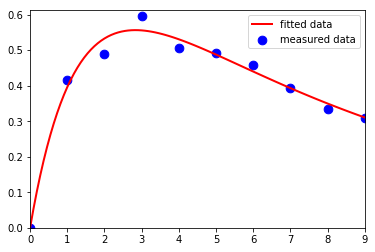

In [91]:
def f(y, t, paras):
    """
    Your system of differential equations
    """

    x1 = y[0]
    x2 = y[1]
    x3 = y[2]

    try:
        k0 = paras['k0'].value
        k1 = paras['k1'].value

    except KeyError:
        k0, k1 = paras
    # the model equations
    f0 = -k0 * x1
    f1 = k0 * x1 - k1 * x2
    f2 = k1 * x2
    return [f0, f1, f2]


def g(t, x0, paras):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f, x0, t, args=(paras,))
    return x


def residual(paras, t, data):

    """
    compute the residual between actual data and fitted data
    """

    x0 = paras['x10'].value, paras['x20'].value, paras['x30'].value
    model = g(t, x0, paras)

    # you only have data for one of your variables
    x2_model = model[:, 1]
    return (x2_model - data).ravel()


# initial conditions
x10 = 5.
x20 = 0
x30 = 0
y0 = [x10, x20, x30]

# measured data
#Notice you do not have data at ALL times
#YOu do not have data for ALL variables
t_measured = np.linspace(0, 9, 10)
x2_measured = np.array([0.000, 0.416, 0.489, 0.595, 0.506, 0.493, 0.458, 0.394, 0.335, 0.309])

plt.figure()
plt.scatter(t_measured, x2_measured, marker='o', color='b', label='measured data', s=75)

# set parameters including bounds; you can also fix parameters (use vary=False)
params = Parameters()
#Initial conditions ARE parameters. They assume they know the initial conditions;
params.add('x10', value=x10, vary=False)
params.add('x20', value=x20, vary=False)
params.add('x30', value=x30, vary=False)

#These are the two kinetic rates, they do not know them. 
params.add('k0', value=0.2, min=0.0001, max=2.)
params.add('k1', value=0.3, min=0.0001, max=2.)

# fit model
#This next line DOES the minimization
result = minimize(residual, params, args=(t_measured, x2_measured), method='leastsq')  # leastsq nelder

# check results of the fit
data_fitted = g(np.linspace(0., 9., 100), y0, result.params)

# plot fitted data
plt.plot(np.linspace(0., 9., 100), data_fitted[:, 1], '-', linewidth=2, color='red', label='fitted data')
plt.legend()
plt.xlim([0, max(t_measured)])
plt.ylim([0, 1.1 * max(data_fitted[:, 1])])
# display fitted statistics
report_fit(result)

plt.show()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 155
    # data points      = 27
    # variables        = 2
    chi-square         = 20.4812629
    reduced chi-square = 0.81925052
    Akaike info crit   = -3.46081286
    Bayesian info crit = -0.86913913
[[Variables]]
    N:        20000 (fixed)
    R:        30000 (fixed)
    T:        7000 (fixed)
    I:        1000 (fixed)
    alpha:    0 (fixed)
    Thy:      1 (fixed)
    Thy_max:  1 (fixed)
    epsilon:  0 (fixed)
    a:        0.09 (fixed)
    c:        0 (fixed)
    b_R:      0 (fixed)
    mu:       1344.36390 +/- 1195.43041 (88.92%) (init = 12427)
    beta:     0.01 (fixed)
    g:        6.0224e-12 +/- 0.02449689 (406762599389.06%) (init = 0)
    b_T:      20 (fixed)
    d:        500 (fixed)
    e_T:      300 (fixed)
    e_R:      800 (fixed)
    f:        0.1 (fixed)
    kA:       1 (fixed)
    n:        0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(mu, g) = -0.947


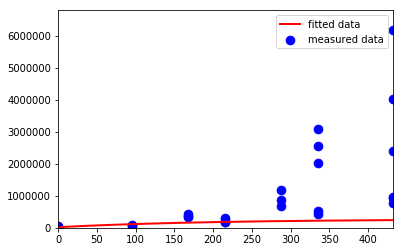

In [7]:
def ModelV4(y,t,paras):
    """
    Similar to vectorfield. 
    The only difference is that this one takes time points where the equations need to be solve for. 

    """
#     Initial Conditions
    
    N = y[0]
    T = y[1]
    R = y[2]
    I = y[3]
        
#         Parameters
    alpha = paras['alpha'].value
    Thy = paras['Thy'].value
    Thy_max = paras['Thy_max'].value
    epsilon = paras['epsilon'].value
    a = paras['a'].value
    c = paras['c'].value
    b_R = paras['b_R'].value
    mu = paras['mu'].value
    beta = paras['beta'].value
    g = paras['g'].value
    b_T = paras['b_T'].value
    d = paras['d'].value
    e_T = paras['e_T'].value
    e_R = paras['e_R'].value
    f = paras['f'].value
    kA = paras['kA'].value
    n = paras['n'].value
        
   
    
    Nf = mu*(Thy/Thy_max) - beta*N*(1/(1+(R/kA)**n)) - c*N - g*N
    Tf = beta*N*(1/(1+(R/kA)**n)) + a*I*T - b_T*T
    Rf = alpha*(Thy/Thy_max) + epsilon*a*I*R + c*N - b_R*R
    If = d*T - e_T*I*T - e_R*I*R - f*I   
         
    return [Nf, Tf, Rf, If]


def solvingModel(t, x0, paras):
    """
    Solution to the ODE x'(t) = ModelV4(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(ModelV4, x0, t, args=(paras,))
    return x

def residuals(paras, t, data):
    
    """
    Compute the residuals between actual data and fitted data
    """
    #Takes the initial conditions
    w0 = paras['N'].value, paras['T'].value, paras['R'].value, paras['I'].value
    model = solvingModel(t, w0, paras)

    # Model will return data in the form of N(0), T(1),R(2),I(3)
#     TODO Depending on the what population that I am looking at, the bottom needs to be adjusted accordingly
    x2_model = model[:, 0]
    # .ravel() - Return a contiguous flattened array.
#     TODO - Something tells me that the na's will mess it up here? True? 
    return ((x2_model - data)/data).ravel()

# initial conditions
N1 = 20000
T1 = 7000
R1 = 30000
I1 = 1000
y0 = [N1, T1, R1, I1]



t_measured = pop.loc[:,'Hour'].copy()
x2_measured = pop.loc[:,'NaiveT'].copy()

plt.figure()
plt.scatter(t_measured, x2_measured, marker='o', color='b', label='measured data', s=75)

# set parameters including bounds; you can also fix parameters (use vary=False)
params = Parameters()
#Initial conditions ARE parameters. They assume they know the initial conditions;
params.add('N', value=N1, vary=False)
params.add('R', value=R1, vary=False)
params.add('T', value=T1, vary=False)
params.add('I', value=I1, vary=False)

#Kintetic rates that we do not know
params.add('alpha', value=0.0, vary=False)
params.add('Thy', value=1.0, vary=False)
params.add('Thy_max', value=1.0, vary=False)
params.add('epsilon', value=0.0, vary=False)
params.add('a', value=0.09, vary=False)
params.add('c', value=0.0, vary=False)
params.add('b_R', value=0., vary=False)
params.add('mu', value=12427.0, min=00.0, max=15000.0)
params.add('beta', value=0.01, vary=False)
params.add('g', value=0.0, min = 0.0, max =5)
params.add('b_T', value=20.0, vary=False)
params.add('d', value=500.0, vary=False)
params.add('e_T', value=300.0, vary=False)
params.add('e_R', value=800.0, vary=False)
params.add('f', value=0.1, vary=False)
params.add('kA', value=1, vary=False)
params.add('n', value=0.0, vary=False)

#This next line DOES the minimization
result = minimize(residuals, params, args=(t_measured, x2_measured), method='leastsq', nan_policy='omit')  # leastsq nelder

# check results of the fit
data_fitted = solvingModel(np.linspace(0, 458, 459), y0, result.params)

# plot fitted data
plt.plot(np.linspace(0, 458, 459), data_fitted[:, 0], '-', linewidth=2, color='red', label='fitted data')
plt.legend()
plt.xlim([0, max(t_measured)])
plt.ylim([0, 1.1 * max(x2_measured)])
# display fitted statistics
report_fit(result)

plt.show()

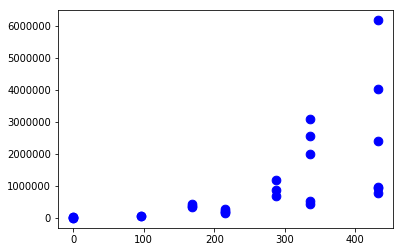

In [6]:
plt.figure()
plt.scatter(t_measured, x2_measured, marker='o', color='b', label='measured data', s=75)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 27
    # variables        = 2
    chi-square         = 3.1021e+26
    reduced chi-square = 1.2408e+25
    Akaike info crit   = 1561.99312
    Bayesian info crit = 1564.58480
[[Variables]]
    N:        20000 (fixed)
    R:        30000 (fixed)
    T:        7000 (fixed)
    I:        1000 (fixed)
    alpha:    0 (fixed)
    Thy:      1 (fixed)
    Thy_max:  1 (fixed)
    epsilon:  0 (fixed)
    a:        0.09 (fixed)
    c:        0 (fixed)
    b_R:      0 (fixed)
    mu:       12427.0000 +/- 1618.29438 (13.02%) (init = 12427)
    beta:     0.01 (fixed)
    g:        0.00000000 +/- 3.3947e-14 (inf%) (init = 0)
    b_T:      20 (fixed)
    d:        500 (fixed)
    e_T:      300 (fixed)
    e_R:      800 (fixed)
    f:        0.1 (fixed)
    kA:       1 (fixed)
    n:        0 (fixed)


/home/jon/anaconda3/lib/python3.7/site-packages/lmfit/printfuncs.py:179: RuntimeWarning: divide by zero encountered in double_scalars
  spercent = '({:.2%})'.format(abs(par.stderr/par.value))


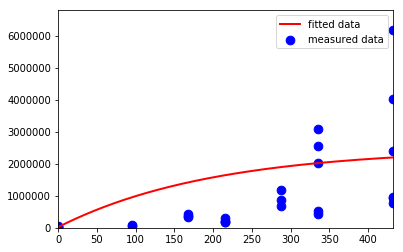

In [8]:
def ModelV4(y,t,paras):
    """
    Similar to vectorfield. 
    The only difference is that this one takes time points where the equations need to be solve for. 

    """
#     Initial Conditions
    
    N = y[0]
    T = y[1]
    R = y[2]
    I = y[3]
        
#         Parameters
    alpha = paras['alpha'].value
    Thy = paras['Thy'].value
    Thy_max = paras['Thy_max'].value
    epsilon = paras['epsilon'].value
    a = paras['a'].value
    c = paras['c'].value
    b_R = paras['b_R'].value
    mu = paras['mu'].value
    beta = paras['beta'].value
    g = paras['g'].value
    b_T = paras['b_T'].value
    d = paras['d'].value
    e_T = paras['e_T'].value
    e_R = paras['e_R'].value
    f = paras['f'].value
    kA = paras['kA'].value
    n = paras['n'].value
        
   
    
    Nf = mu*(Thy/Thy_max) - beta*N*(1/(1+(R/kA)**n)) - c*N - g*N
    Tf = beta*N*(1/(1+(R/kA)**n)) + a*I*T - b_T*T
    Rf = alpha*(Thy/Thy_max) + epsilon*a*I*R + c*N - b_R*R
    If = d*T - e_T*I*T - e_R*I*R - f*I   
         
    return [Nf, Tf, Rf, If]


def solvingModel(t, x0, paras):
    """
    Solution to the ODE x'(t) = ModelV4(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(ModelV4, x0, t, args=(paras,))
    return x

def residuals(paras, t, data):
    
    """
    Compute the residuals between actual data and fitted data
    """
    #Takes the initial conditions
    w0 = paras['N'].value, paras['T'].value, paras['R'].value, paras['I'].value
    model = solvingModel(t, w0, paras)

    # Model will return data in the form of N(0), T(1),R(2),I(3)
#     TODO Depending on the what population that I am looking at, the bottom needs to be adjusted accordingly
    x2_model = model[:, 0]
    # .ravel() - Return a contiguous flattened array.
#     TODO - Something tells me that the na's will mess it up here? True? 
    return ((x2_model - data)**2).ravel()

# initial conditions
N1 = 20000
T1 = 7000
R1 = 30000
I1 = 1000
y0 = [N1, T1, R1, I1]



t_measured = pop.loc[:,'Hour'].copy()
x2_measured = pop.loc[:,'NaiveT'].copy()

plt.figure()
plt.scatter(t_measured, x2_measured, marker='o', color='b', label='measured data', s=75)

# set parameters including bounds; you can also fix parameters (use vary=False)
params = Parameters()
#Initial conditions ARE parameters. They assume they know the initial conditions;
params.add('N', value=N1, vary=False)
params.add('R', value=R1, vary=False)
params.add('T', value=T1, vary=False)
params.add('I', value=I1, vary=False)

#Kintetic rates that we do not know
params.add('alpha', value=0.0, vary=False)
params.add('Thy', value=1.0, vary=False)
params.add('Thy_max', value=1.0, vary=False)
params.add('epsilon', value=0.0, vary=False)
params.add('a', value=0.09, vary=False)
params.add('c', value=0.0, vary=False)
params.add('b_R', value=0., vary=False)
params.add('mu', value=12427.0, min=00.0, max=15000.0)
params.add('beta', value=0.01, vary=False)
params.add('g', value=0.0, min = 0.0, max =5)
params.add('b_T', value=20.0, vary=False)
params.add('d', value=500.0, vary=False)
params.add('e_T', value=300.0, vary=False)
params.add('e_R', value=800.0, vary=False)
params.add('f', value=0.1, vary=False)
params.add('kA', value=1, vary=False)
params.add('n', value=0.0, vary=False)

#This next line DOES the minimization
result = minimize(residuals, params, args=(t_measured, x2_measured), method='leastsq', nan_policy='omit')  # leastsq nelder

# check results of the fit
data_fitted = solvingModel(np.linspace(0, 458, 459), y0, result.params)

# plot fitted data
plt.plot(np.linspace(0, 458, 459), data_fitted[:, 0], '-', linewidth=2, color='red', label='fitted data')
plt.legend()
plt.xlim([0, max(t_measured)])
plt.ylim([0, 1.1 * max(x2_measured)])
# display fitted statistics
report_fit(result)

plt.show()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 91
    # data points      = 27
    # variables        = 2
    chi-square         = 4.1923e+13
    reduced chi-square = 1.6769e+12
    Akaike info crit   = 761.917330
    Bayesian info crit = 764.509003
[[Variables]]
    N:        20000 (fixed)
    R:        30000 (fixed)
    T:        7000 (fixed)
    I:        1000 (fixed)
    alpha:    0 (fixed)
    Thy:      1 (fixed)
    Thy_max:  1 (fixed)
    epsilon:  0 (fixed)
    a:        0.09 (fixed)
    c:        0 (fixed)
    b_R:      0 (fixed)
    mu:       9418.05314 +/- 848.261413 (9.01%) (init = 12427)
    beta:     0.01 (fixed)
    g:        1.9451e-07 +/- 0.00509631 (2620043.90%) (init = 0)
    b_T:      20 (fixed)
    d:        500 (fixed)
    e_T:      300 (fixed)
    e_R:      800 (fixed)
    f:        0.1 (fixed)
    kA:       1 (fixed)
    n:        0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(mu, g) =  0.771


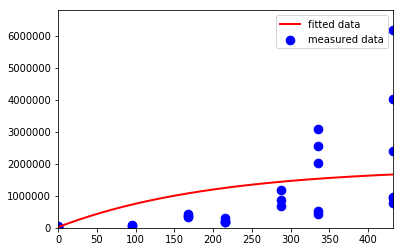

In [9]:
def ModelV4(y,t,paras):
    """
    Similar to vectorfield. 
    The only difference is that this one takes time points where the equations need to be solve for. 

    """
#     Initial Conditions
    
    N = y[0]
    T = y[1]
    R = y[2]
    I = y[3]
        
#         Parameters
    alpha = paras['alpha'].value
    Thy = paras['Thy'].value
    Thy_max = paras['Thy_max'].value
    epsilon = paras['epsilon'].value
    a = paras['a'].value
    c = paras['c'].value
    b_R = paras['b_R'].value
    mu = paras['mu'].value
    beta = paras['beta'].value
    g = paras['g'].value
    b_T = paras['b_T'].value
    d = paras['d'].value
    e_T = paras['e_T'].value
    e_R = paras['e_R'].value
    f = paras['f'].value
    kA = paras['kA'].value
    n = paras['n'].value
        
   
    
    Nf = mu*(Thy/Thy_max) - beta*N*(1/(1+(R/kA)**n)) - c*N - g*N
    Tf = beta*N*(1/(1+(R/kA)**n)) + a*I*T - b_T*T
    Rf = alpha*(Thy/Thy_max) + epsilon*a*I*R + c*N - b_R*R
    If = d*T - e_T*I*T - e_R*I*R - f*I   
         
    return [Nf, Tf, Rf, If]


def solvingModel(t, x0, paras):
    """
    Solution to the ODE x'(t) = ModelV4(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(ModelV4, x0, t, args=(paras,))
    return x

def residuals(paras, t, data):
    
    """
    Compute the residuals between actual data and fitted data
    """
    #Takes the initial conditions
    w0 = paras['N'].value, paras['T'].value, paras['R'].value, paras['I'].value
    model = solvingModel(t, w0, paras)

    # Model will return data in the form of N(0), T(1),R(2),I(3)
#     TODO Depending on the what population that I am looking at, the bottom needs to be adjusted accordingly
    x2_model = model[:, 0]
    # .ravel() - Return a contiguous flattened array.
#     TODO - Something tells me that the na's will mess it up here? True? 
    return ((x2_model - data)).ravel()

# initial conditions
N1 = 20000
T1 = 7000
R1 = 30000
I1 = 1000
y0 = [N1, T1, R1, I1]



t_measured = pop.loc[:,'Hour'].copy()
x2_measured = pop.loc[:,'NaiveT'].copy()

plt.figure()
plt.scatter(t_measured, x2_measured, marker='o', color='b', label='measured data', s=75)

# set parameters including bounds; you can also fix parameters (use vary=False)
params = Parameters()
#Initial conditions ARE parameters. They assume they know the initial conditions;
params.add('N', value=N1, vary=False)
params.add('R', value=R1, vary=False)
params.add('T', value=T1, vary=False)
params.add('I', value=I1, vary=False)

#Kintetic rates that we do not know
params.add('alpha', value=0.0, vary=False)
params.add('Thy', value=1.0, vary=False)
params.add('Thy_max', value=1.0, vary=False)
params.add('epsilon', value=0.0, vary=False)
params.add('a', value=0.09, vary=False)
params.add('c', value=0.0, vary=False)
params.add('b_R', value=0., vary=False)
params.add('mu', value=12427.0, min=00.0, max=15000.0)
params.add('beta', value=0.01, vary=False)
params.add('g', value=0.0, min = 0.0, max =5)
params.add('b_T', value=20.0, vary=False)
params.add('d', value=500.0, vary=False)
params.add('e_T', value=300.0, vary=False)
params.add('e_R', value=800.0, vary=False)
params.add('f', value=0.1, vary=False)
params.add('kA', value=1, vary=False)
params.add('n', value=0.0, vary=False)

#This next line DOES the minimization
result = minimize(residuals, params, args=(t_measured, x2_measured), method='leastsq', nan_policy='omit')  # leastsq nelder

# check results of the fit
data_fitted = solvingModel(np.linspace(0, 458, 459), y0, result.params)

# plot fitted data
plt.plot(np.linspace(0, 458, 459), data_fitted[:, 0], '-', linewidth=2, color='red', label='fitted data')
plt.legend()
plt.xlim([0, max(t_measured)])
plt.ylim([0, 1.1 * max(x2_measured)])
# display fitted statistics
report_fit(result)

plt.show()